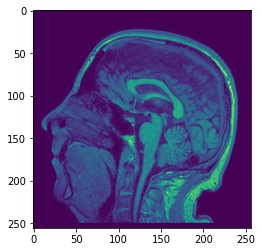

In [25]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

sitk_t1 = sitk.ReadImage('t1.nii.gz') 
t1 = sitk.GetArrayFromImage(sitk_t1)

plt.imshow(t1[1][0][45])

In [14]:
t1.shape

(2, 1, 90, 256, 256)

In [57]:
import numpy as np
import sigpy as sp
import sigpy.plot as pl
from sigpy.mri import radial
coord_mri = sp.mri.radial([200,256,2],[256,256])

In [145]:
coord_mri.shape


(200, 256, 2)

In [136]:
5%2

1

In [144]:
list = coord_mri[1]

for i in range(len(coord_mri[1])):
    if (i%2!=0):
        list[i] = -list[i+1]
list


IndexError: index 256 is out of bounds for axis 0 with size 256

In [120]:
sample_coord = np.zeros(coord_mri.shape)

sample_coord[0]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [155]:
import sigpy
f_img = sigpy.fft(t1[0][0][45])

In [156]:
f_img.shape

(256, 256)

In [157]:
coord_mri.shape

(200, 256, 2)

In [177]:
a = sigpy.interpolate(f_img, coord_mri, kernel='kaiser_bessel', width=2, param=1)


ValueError: cannot reshape array of size 65536 into shape (200,51200)

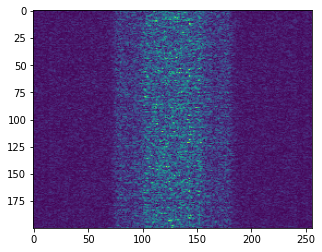

In [175]:
if_img = sigpy.ifft(a)
plt.imshow(abs(if_img))

In [159]:
sigpy.gridding(f_img,shape =(256,2) , coord=coord_mri)

ValueError: cannot reshape array of size 65536 into shape (1,51200)

In [113]:
f_img[200,200]

(-7.956167926407013-0.8005618827383127j)

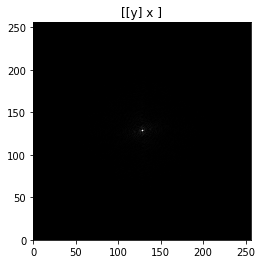

In [104]:
sigpy.plot.ImagePlot(f_img)

In [70]:
f_img[0][0]

(-0.41015625+0j)

In [51]:
ksp = np.load('projection_ksp.npy')
coord = np.load('projection_coord.npy')
print('k-space array shape: {}'.format(ksp.shape))
print('coordinate array shape: {}'.format(coord.shape))

k-space array shape: (12, 96, 512)
coordinate array shape: (96, 512, 2)


In [80]:
coord[1]

array([[ 149.9197   ,   -4.9078627],
       [ 149.33292  ,   -4.8886533],
       [ 148.74615  ,   -4.869445 ],
       ...,
       [-148.74615  ,    4.869445 ],
       [-149.33292  ,    4.8886533],
       [-149.9197   ,    4.9078627]], dtype=float32)

In [82]:
((-148.74615)**2+(4.869445)**2)**0.5

148.8258332226987

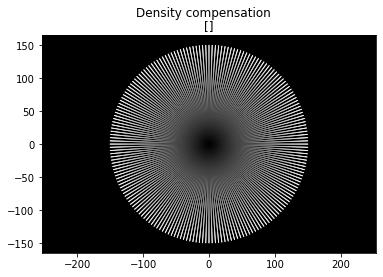

In [52]:
dcf = (coord[..., 0]**2 + coord[..., 1]**2)**0.5
pl.ScatterPlot(coord, dcf, title='Density compensation')

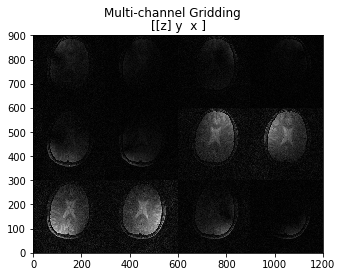

In [53]:
img_grid = sp.nufft_adjoint(ksp * dcf, coord)
pl.ImagePlot(img_grid, z=0, title='Multi-channel Gridding')